In [ ]:
import sys
sys.path.append("..")

In [2]:
from train_autoencoder import *
from test_autoencoder import *

In [3]:
from C2D_Models import *

In [4]:
models = [
#     C2D_AE_128_3x3(channels=1),
    C2D_AE_128_3x3(channels=3),
         ]

model_names = [
#     "C2D_3x3_128_2xE_L2_FP",
    "C2D_3x3_128_2xE_L2",
]

model_names = [join_paths(["../../VAD_models/C2D_AE_models/128/L2_Regularization/", mn+"_MSE_AVENUE"]) for mn in model_names]    

# Training

In [5]:
optimizers = [ADAM(m) for m in models]
losses = [MSE_LOSS() for m in models]

In [6]:
train_data = Avenue()

16it [01:23,  5.25s/it]


In [7]:
train_loader, val_loader = get_data_loaders(train_data, batch_size=48)

In [8]:
trainer = AutoEncoder_Trainer(
    models,
    model_names,
    train_loader, 
    val_loader,
    optimizers,
    losses,
    epochs = 300,
)

Estimated Time 1.41 hours | Will be completed by 2020-11-27 01:22:
------------------------------------------------------------
Epoch: [001/300] | time/epoch: 16.92 seconds
------------------------------------------------------------
Model: ../../VAD_models/C2D_AE_models/128/L2_Regularization/C2D_3x3_128_2xE_L2_MSE_AVENUE/C2D_3x3_128_2xE_L2_MSE_AVENUE.pth.tar
                Loss
Training    0.012369
Validation  0.008912
----------------------------------------
------------------------------------------------------------
Epoch: [002/300] | time/epoch: 16.92 seconds
------------------------------------------------------------
Model: ../../VAD_models/C2D_AE_models/128/L2_Regularization/C2D_3x3_128_2xE_L2_MSE_AVENUE/C2D_3x3_128_2xE_L2_MSE_AVENUE.pth.tar
                Loss
Training    0.003362
Validation  0.003839
----------------------------------------
------------------------------------------------------------
Epoch: [003/300] | time/epoch: 16.90 seconds
-----------------------------

['../../VAD_models/C2D_AE_models/128/L2_Regularization/C2D_3x3_128_2xE_L2_MSE_AVENUE']

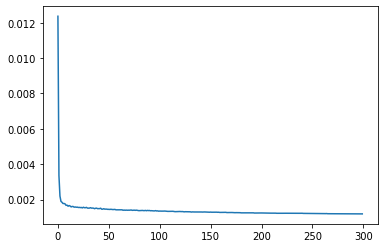

In [9]:
trainer.train()

In [10]:
for ae_model in trainer.autoencoder_models:
    save_model(ae_model.model, ae_model.model_file)

In [11]:
print("Training done")

Training done


# Testing

In [12]:
test_data = Avenue(isTrain=False, sample_stride = 1)

21it [01:23,  4.00s/it]


In [13]:
for ae_model in trainer.autoencoder_models:
    print("-"*40)
    print(ae_model.model_file)
    tester = AutoEncoder_Tester(
        ae_model.model,
        test_data,
    )
    results = tester.test(save_as = ".pkl".join(ae_model.model_file.split(".pth.tar")))
    print("="*40)

0it [00:00, ?it/s]

----------------------------------------
../../VAD_models/C2D_AE_models/128/L2_Regularization/C2D_3x3_128_2xE_L2_MSE_AVENUE/C2D_3x3_128_2xE_L2_MSE_AVENUE.pth.tar


1it [00:14, 14.06s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


7it [01:09,  9.35s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


8it [01:10,  6.70s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


9it [01:21,  8.02s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


16it [02:11,  7.22s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


17it [02:15,  6.29s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


18it [02:18,  5.26s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


19it [02:20,  4.43s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


20it [02:23,  3.92s/it]

Calculation of AUC-ROC score Only one class present in y_true. ROC AUC score is not defined in that case.


21it [02:24,  6.88s/it]


AUC-ROC Score of  OneClassSVM: 0.6946732345107689
-------------------- TEST RESULTS --------------------
{'agg_abs_reg_aucroc': 0.7031199615082666,
 'agg_sqr_reg_aucroc': 0.8335320732106632,
 'mean_abs_vid_aucroc': 0.8364555196814226,
 'mean_sqr_vid_aucroc': 0.832698478241973,
 'overall_abs_aucroc': 0.9178566855396117,
 'overall_sqr_aucroc': 0.9605946891270201}


<Figure size 432x288 with 0 Axes>

In [14]:
exit()